Assignment 3

Import necessary libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

Image Augmentation

In [8]:
from google.colab import drive
drive.mount('/content/drive/')
data_path = '/content/drive/MyDrive/dataset/flowers/'
batch_size = 32
target_size = (64, 64)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [10]:
X_train = train_datagen.flow_from_directory(data_path,target_size=target_size,batch_size=batch_size,subset="training",class_mode='categorical')
X_test = test_datagen.flow_from_directory(data_path,target_size=target_size,batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Create model

In [11]:
model = Sequential()

Add layers

In [12]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

Compile the model

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fit the model

In [14]:
model.fit(X_train, steps_per_epoch=100, epochs=15)

Epoch 1/15
100/100 [==============================] - 29s 271ms/step - loss: 1.3171 - accuracy: 0.4074
Epoch 2/15
100/100 [==============================] - 25s 252ms/step - loss: 1.1414 - accuracy: 0.5298
Epoch 3/15
100/100 [==============================] - 27s 265ms/step - loss: 1.0823 - accuracy: 0.5658
Epoch 4/15
100/100 [==============================] - 26s 257ms/step - loss: 0.9996 - accuracy: 0.5989
Epoch 5/15
100/100 [==============================] - 26s 257ms/step - loss: 0.9346 - accuracy: 0.6428
Epoch 6/15
100/100 [==============================] - 26s 255ms/step - loss: 0.9086 - accuracy: 0.6485
Epoch 7/15
100/100 [==============================] - 26s 255ms/step - loss: 0.8738 - accuracy: 0.6570
Epoch 8/15
100/100 [==============================] - 26s 255ms/step - loss: 0.8466 - accuracy: 0.6794
Epoch 9/15
100/100 [==============================] - 25s 253ms/step - loss: 0.8086 - accuracy: 0.6904
Epoch 10/15
100/100 [==============================] - 25s 251ms/step - l

Save the model

In [15]:
model.save("model.h5")


Test the model

In [16]:
def predict():
    img = image.load_img("/content/drive/MyDrive/dataset/flowers/rose/1775233884_12ff5a124f.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    
    print(f'The given image is a {prediction}')
    plt.imshow(plt.imread("/content/drive/MyDrive/dataset/flowers/rose/1775233884_12ff5a124f.jpg"))
    plt.axis('off')
    plt.show()
  

The given image is a rose


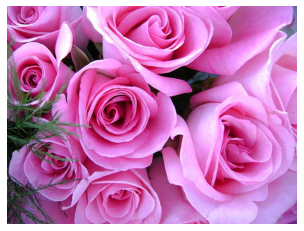

In [17]:
predict()